# KDD Cup 1999 Data (https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)

Conjunto de dados usado para a Terceira Competição Internacional de Ferramentas de Mineração de Dados e Descoberta de Conhecimento, que foi realizada em conjunto com a KDD-99, a Quinta Conferência Internacional sobre Descoberta de Conhecimento e Mineração de Dados.

* Adaptado do artigo "Cost-based Modeling and Evaluation for Data Mining With Application to Fraud and Intrusion Detection: Results from the JAM Project", de Salvatore J. Stolfo, Wei Fan, Wenke Lee, Andreas Prodromidis e Philip K. Chan.

* Uma conexão é uma sequência de pacotes TCP começando e terminando em alguns momentos bem definidos, entre os quais os dados fluem de e para um endereço IP de origem para um endereço IP de destino sob algum protocolo bem definido. Cada conexão é rotulada como normal ou como um ataque, com exatamente um tipo de ataque específico. Cada registro de conexão consiste em cerca de 100 bytes.

## Objetivo:

Construir um modelo preditivo, baseado em classificação, capaz de distinguir entre conexões "ruins", que são os ataques, das conexões "boas" ou normais.

## Dataset:

O dataset foi preparado pelo MIT Lincoln Labs através de intrusões simuladas em um ambiente de rede militar, em 1998, e possui as seguintes características:
colunas = 42
Linhas = 4.898.429

## Ataques:

Os ataques se enquadram em quatro categorias principais:

- DoS: negação de serviço, por exemplo inundação de syn (syn flood);
- R2L: acesso não autorizado de uma máquina remota, por ex. adivinhando a senha;
- U2R: acesso não autorizado a privilégios de superusuário (root) local, por exemplo, vários ataques de "buffer overflow";
- Sondagem (Probing): vigilância e outra sondagem, por exemplo, varredura de porta.

## Descrição das Features: (obs: das 42 features, somente 31 são descritas abaixo. Segundo os autores, são features definidas para os registros de conexão:

Para saber mais sobre as Features, acesse o link: https://kdd.ics.uci.edu/databases/kddcup99/task.html

## Update:

O projeto passou a usar o dataset NSL-KDD que é, segundo [1], uma versão do dataset original do KDD Cup 1999 que visa corrigir alguns problemas inerentes mencionados pelos autores. Embora não seja uma representação perfeita das redes reais existentes, devido a falta de datasets públicos para NIDS, os autores acreditam que pode ser aplicado como referência para ajudar pesquisadores.

O dataset utilizado neste projeto foi o KDDTrain+.txt.

Tanto os datasets como maiores informações sobre o NLS-KDD, estão no site do Canadian Institute for Cybersecurity: https://www.unb.ca/cic/datasets/nsl.html

[1] - M. Tavallaee, E. Bagheri, W. Lu, and A. Ghorbani, “A Detailed Analysis of the KDD CUP 99 Data Set,” Submitted to Second IEEE Symposium on Computational Intelligence for Security and Defense Applications (CISDA), 2009.

# Análise Exploratória dos Dados

In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, auc, roc_auc_score, roc_curve, classification_report, mean_squared_error, mean_absolute_error
from collections import Counter
import pickle

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# conjunto de dados não tem nomes de coluna, então temos que fornecê-lo
headers = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target","difficulty_level"]

df = pd.read_csv('KDDTrain+.txt', header=None, names=headers)

df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [3]:
# Removendo as colunas que não serão utilizadas
df.drop(['difficulty_level'], axis=1, inplace=True)
df.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [4]:
df.shape

(125973, 41)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [6]:
# Número de rótulos de ataque
df.target.value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: target, dtype: int64

In [7]:
# Verificando valores nulos
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

In [8]:
# Estatísticas Descritivas da Base de Dados
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Agrupando o conjunto de dados com base na variável 'target'
df.groupby('target').mean()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
target,,,,,,,,,,,,,,,,,,,,,
back,0.297071,5.365593e+04,8.127597e+03,0.000000,0.000000,0.000000,1.916318,0.000000,1.000000,0.923640,...,145.770921,145.770921,1.000000,0.000000,0.023431,0.000000,0.002029,0.002029,0.063902,0.063902
buffer_overflow,91.700000,1.400433e+03,6.339833e+03,0.000000,0.000000,0.000000,2.066667,0.000000,1.000000,1.500000,...,3.066667,13.900000,1.000000,0.000000,0.680667,0.075000,0.000000,0.000000,0.021333,0.021333
ftp_write,32.375000,2.207500e+02,5.382250e+03,0.000000,0.000000,0.375000,0.500000,0.000000,0.750000,0.125000,...,1.500000,22.750000,0.875000,0.250000,0.875000,0.117500,0.000000,0.000000,0.000000,0.000000
guess_passwd,2.716981,1.253396e+02,2.161887e+02,0.000000,0.000000,0.000000,1.056604,1.056604,0.018868,0.000000,...,26.018868,26.037736,1.000000,0.000000,0.105283,0.018868,0.101509,0.101509,0.879245,0.879245
imap,6.545455,3.791818e+02,5.994400e+04,0.000000,0.000000,0.000000,0.363636,0.000000,0.090909,1.454545,...,28.636364,5.545455,0.909091,0.000909,0.666364,0.000000,0.579091,0.579091,0.002727,0.000000
ipsweep,3.616004,9.605168e+00,1.514643e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.006946,0.001111,...,6.201445,81.267574,0.875782,0.131428,0.875777,0.536757,0.000006,0.000022,0.122306,0.113790
land,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.222222,4.333333,0.848333,0.031111,0.848333,0.562222,0.876111,0.633889,0.007222,0.000000
loadmodule,36.222222,1.518889e+02,3.009889e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.888889,0.555556,...,2.666667,3.555556,0.835556,0.205556,0.735556,0.207778,0.000000,0.000000,0.000000,0.011111
multihop,184.000000,4.351429e+02,2.130163e+05,0.000000,0.000000,0.000000,3.000000,0.000000,0.571429,8.571429,...,74.000000,1.571429,0.715714,0.002857,0.714286,0.000000,0.000000,0.000000,0.011429,0.000000


<AxesSubplot:>

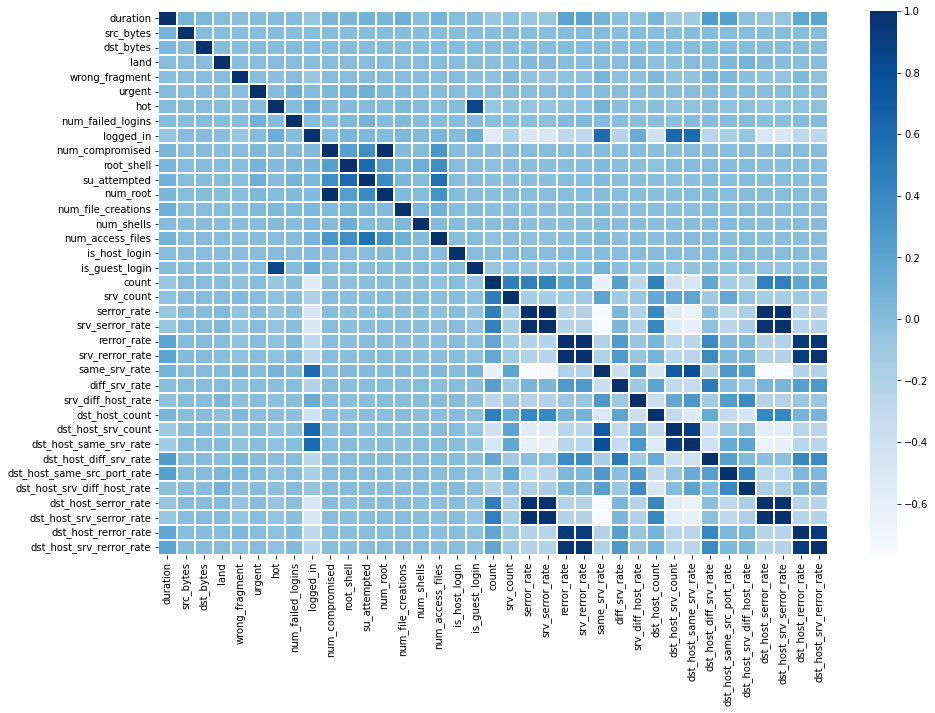

In [10]:
# Gráfico de Correlação
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='Blues', linewidths=0.2)

In [11]:
# Alterando rótulos de ataque para as suas respectivas classes de ataque

def change_target(data):
  df.target.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'DoS', inplace=True)
  df.target.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail', 'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L', inplace=True)
  df.target.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe', inplace=True)
  df.target.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R', inplace=True)

# Chamando a função
change_target(df)

# Distribuição das classes de ataque
df.target.value_counts()

normal    67343
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: target, dtype: int64

In [ ]:
"""
Inferências sobre o conjunto de dados até o momento:

- O conjunto de dados possui 125.973 registros em 40 colunas
- Podemos observar que os dados estão distorcidos para a maioria dos recursos
- Há um ligeiro desbalanceamento entre os dados de ataque e os dados de normal
- O valor médio para a maioria dos recursos é maior para os dados de ataque
"""

## Normalização dos Dados

In [12]:
# Usando o StandardScaler para normalizar os dados

numeric_col = df.select_dtypes(include='number').columns

scaler = StandardScaler()

def normalization(data, col):
  for i in col:
    arr = data[i]
    arr = np.array(arr)
    data[i] = scaler.fit_transform(arr.reshape(len(arr), 1))
  return data

In [15]:
# Chamando a função para normalizar os dados
df = normalization(df.copy(), numeric_col)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,DoS
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,DoS
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,DoS


In [16]:
# Selecionando atributos de dados categóricos
cat_col = ['protocol_type', 'service', 'flag']

# Criando um dataframe com os dados categóricos
categorical = df[cat_col]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [17]:
# Atributos categóricos usando a função pandas.get_dummies()

categorical = pd.get_dummies(categorical, columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Classificação Binária

In [18]:
# Consolidando os diversos tipos de ataque em uma categoria 'attack'
bin_target = pd.DataFrame(df.target.map(lambda x: 'normal' if x == 'normal' else 'attack'))

# Criando um dataframe com os rótulos de ataque binários (normal e attack)
bin_df = df.copy()
bin_df['target'] = bin_target

In [19]:
# Convertendo os rótulos 'normal' e 'attack' para 0 e 1 respectivamente
# Criando uma nova coluna chamada 'attacks'

le1 = preprocessing.LabelEncoder()

enc_target = bin_target.apply(le1.fit_transform)
bin_df['target_class'] = enc_target

le1.classes_

array(['attack', 'normal'], dtype=object)

In [39]:
# Salvando um arquivo NumPy array com os dados normalizados e dummies

np.save('le1_classes.npy', le1.classes_, allow_pickle=True)

In [21]:
# Dataframe com os rótulos binários e a coluna 'attacks'
bin_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,target_class
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal,1
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,attack,0
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal,1
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1


In [22]:
# Gerando dummies para a coluna 'target'

bin_df = pd.get_dummies(bin_df, columns=['target'], prefix='', prefix_sep='')
bin_df['target'] = bin_target
bin_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target_class,attack,normal,target
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1,0,1,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,attack
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1,0,1,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,attack
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,1,0,1,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,attack


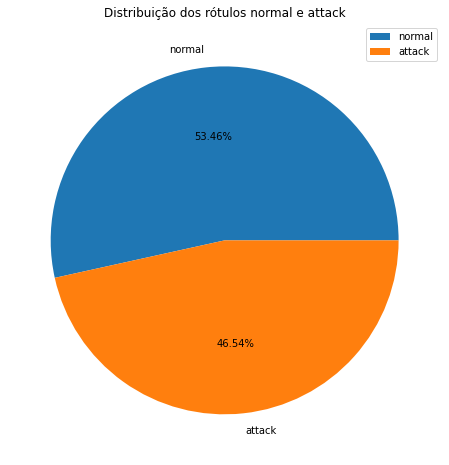

In [23]:
# Plotando o gráfico de distribuição dos rótulos 'normal' e 'attack'

plt.figure(figsize=(8, 8))
plt.pie(bin_df.target.value_counts(), labels=bin_df.target.unique(), autopct='%.2f%%')
plt.title('Distribuição dos rótulos normal e attack')
plt.legend()
plt.show()

## Classificação Multiclasse

In [24]:
# Criando um dataframe com rótulos multiclasse (Dos, Probe, R2L, U2R, normal)

multi_df = df.copy()
multi_target = pd.DataFrame(multi_df.target)

In [25]:
# LabelEnconding para os rótulos multiclasse
le2 = preprocessing.LabelEncoder()
enc_target = multi_target.apply(le2.fit_transform)
multi_df['target_class'] = enc_target

# Salvando um arquivo NumPy array com os dados normalizados e dummies
np.save("le2_classes.npy", le2.classes_, allow_pickle=True)

In [26]:
# Atributos categóricos usando a função pandas.get_dummies()

multi_df = pd.get_dummies(multi_df, columns=['target'], prefix='', prefix_sep='')
multi_df['target'] = multi_target
multi_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target_class,DoS,Probe,R2L,U2R,normal,target
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.224532,-0.376387,4,0,0,0,0,1,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,DoS
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.602433,-0.387635,-0.345084,4,0,0,0,0,1,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,DoS
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.355014,-0.376387,4,0,0,0,0,1,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,DoS


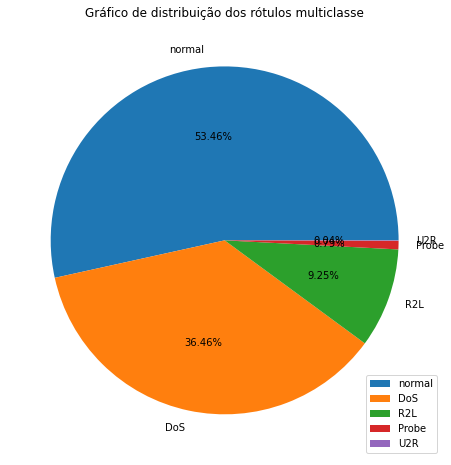

In [27]:
# Gráfico da disctribuição dos rótulos multiclasse

plt.figure(figsize=(8,8))
plt.pie(multi_df.target.value_counts(), labels=multi_df.target.unique(),autopct='%0.2f%%')
plt.title('Gráfico de distribuição dos rótulos multiclasse')
plt.legend()
plt.show()

## Extração de Características

In [28]:
# Criando um dataframe com apenas atributos numéricos de conjunto de dados de classe binária e atributo de rótulo codificado

numeric_bin = bin_df[numeric_col]
numeric_bin['target_class'] = bin_df['target_class']

In [29]:
# Localizando os atributos que têm mais de 0,5 de correlação com o atributo de rótulo de ataque codificado

corr = numeric_bin.corr()
corr_y = abs(corr['target_class'])
highest_corr = corr_y[corr_y > 0.5]
highest_corr.sort_values(ascending=True)

count                       0.576444
srv_serror_rate             0.648289
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
target_class                1.000000
Name: target_class, dtype: float64

In [30]:
# Selecionando atributos encontrados usando o coeficiente de correlação de Pearson (padrão)

numeric_bin = bin_df[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate','logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

#Juntando o atributo selecionado com o dataframe categórico One Hot Enconded

numeric_bin = numeric_bin.join(categorical)

# Juntando o atributo codificado com o One Hot Encoded e com o atributo original do rótulo de ataque

bin_df = numeric_bin.join(bin_df[['target_class', 'attack', 'normal', 'target']])

In [31]:
# Salvando o dataset "KDDTrain_bin.csv"

path = './'
file = 'KDDTrain_bin.csv'

bin_df.to_csv(path + file, index=False)

In [32]:
bin_df

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,target_class,attack,normal,target
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,0,0,0,1,0,1,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,1,0,0,0,0,0,0,1,0,attack
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,...,1,0,0,0,0,0,0,1,0,attack
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,...,1,0,0,0,0,0,0,1,0,attack


In [33]:
# Criando um dataframe apenas com atributos numéricos de dataframe de classe multiclasse e atributo de rótulo codificado

numeric_multi = multi_df[numeric_col]
numeric_multi['target_class'] = multi_df['target_class']

In [34]:
# Localizando os atributos que têm mais de 0,5 de correlação com o atributo de rótulo de ataque codificado

corr = numeric_multi.corr()
corr_y = abs(corr['target_class'])
highest_corr = corr_y[corr_y > 0.5]
highest_corr.sort_values(ascending=True)

count                       0.613251
logged_in                   0.693770
srv_serror_rate             0.710852
serror_rate                 0.712861
dst_host_serror_rate        0.714247
dst_host_same_srv_rate      0.716820
dst_host_srv_serror_rate    0.717387
dst_host_srv_count          0.718579
same_srv_rate               0.798358
target_class                1.000000
Name: target_class, dtype: float64

In [35]:
# Selecionando atributos encontrados usando o coeficiente de correlação de Pearson (padrão)

numeric_multi = multi_df[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate','logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

In [36]:
# Juntando o atributo selecionado com o dataframe categórico One Hot Enconded

numeric_multi = numeric_multi.join(categorical)

# Juntando o atributo codificado com o One Hot Encoded e com o atributo original do rótulo de ataque

multi_df = numeric_multi.join(multi_df[['target_class', 'DoS', 'Probe', 'R2L', 'U2R', 'normal', 'target']])

In [37]:
# Salvando o dataset "KDDTrain_multi.csv"

path = './'
file = 'KDDTrain_multi.csv'
multi_df.to_csv(path + file, index=False)

# Dataset final para classificação multiclasse

multi_df

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,target_class,DoS,Probe,R2L,U2R,normal,target
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,1,0,4,0,0,0,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,0,0,0,0,1,0,0,0,0,DoS
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,...,0,0,0,0,1,0,0,0,0,DoS
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,...,0,0,0,0,1,0,0,0,0,DoS


# Modelos

## 1) Gradient Boosting Classifier

### Classificação Binária

In [309]:
# Lendo o dataset KDD binário:

le1_classes_ = np.load('./le1_classes.npy', allow_pickle=True)

df_bin = pd.read_csv('./KDDTrain_bin.csv')
df_bin

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,target_class,attack,normal,target
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,0,0,0,1,0,1,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,1,0,0,0,0,0,0,1,0,attack
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,...,1,0,0,0,0,0,0,1,0,attack
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,...,1,0,0,0,0,0,0,1,0,attack


In [310]:
# Excluindo do dataset os atributos (attacks, attack, normal, target) do elemento X

X = df_bin.iloc[:,:-4].to_numpy()

# Atributo-alvo como elemento y

y = df_bin['target_class']

In [311]:
# Dividindo o dataset entre treino (75%) e teste (25%):

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [312]:
# Treinando o Gradient Boosting Classifier com hiperparâmetros e ajustando (.fit) os dados:

# Hiperparâmetros
trees_bin = 100 # Número de árvores aleatórias
lea_rate_bin = 1.0 # Taxa de aprendizado

gbc_bin = GradientBoostingClassifier(n_estimators=trees_bin, learning_rate=lea_rate_bin, random_state=5).fit(X_train, y_train).fit(X_train, y_train)

In [314]:
# Calculando o score do GBC:
# Método score retorna a precisão média nos dados de teste e rótulos fornecidos:

gbc_score_bin = gbc_bin.score(X_test, y_test)

print(f'Score:\n {gbc_score_bin}')

Score:
 0.9854575474693592


Matriz de Confusão:
[[True Positive: 14438 - False Positive: 176]
[False Negative: 282 - True Negative: 16598]]



Text(0.5, 0, 'Previsto')

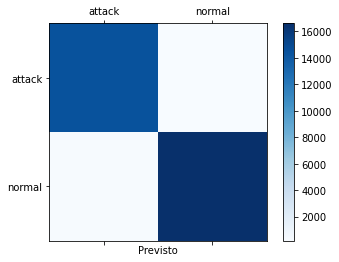

In [315]:
# Matriz de Confusão:

y_pred = gbc_bin.predict(X_test)
conf_matrix_gbc_bin = confusion_matrix(y_pred, y_test)

tp, fp, fn, tn = conf_matrix_bin.ravel()
print(f'Matriz de Confusão:\n[[True Positive: {tp} - False Positive: {fp}]\n[False Negative: {fn} - True Negative: {tn}]]\n')

labels = ['attack', 'normal']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_matrix_gbc_bin, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Previsto')

In [316]:
# Calculando a Precisão usando o modelo GBC:

ac_gbc_bin = accuracy_score(y_test, y_pred) * 100
accur_gbc = ac_gbc_bin
print(f'Precisão do conjunto binário GBC:\n%.2f%%' % ac_gbc_bin)

Precisão do conjunto binário GBC:
98.55%


In [317]:
# Classification Report:

print(classification_report(y_test, y_pred, target_names=le1_classes_, digits=4))

              precision    recall  f1-score   support

      attack     0.9880    0.9808    0.9844     14720
      normal     0.9833    0.9895    0.9864     16774

    accuracy                         0.9855     31494
   macro avg     0.9856    0.9852    0.9854     31494
weighted avg     0.9855    0.9855    0.9855     31494



In [318]:
# Calculando outras métricas importantes:

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_score = metrics.explained_variance_score(y_test, y_pred) * 100
recall_score = tp / (tp + fn)

print("Mean Absolute Error (MAE) - " , mae)
print("Mean Squared Error (MSE) - " , mse)
print("Root Mean Squared Error (RMSE) - " , rmse)
print('recall_score:', recall_score)
print("R2 Score - " , r2_score)
print("Accuracy - ", ac)

Mean Absolute Error (MAE) -  0.014542452530640756
Mean Squared Error (MSE) -  0.014542452530640756
Root Mean Squared Error (RMSE) -  0.12059209149293645
recall_score: 0.9808423913043478
R2 Score -  94.16272142186925
Accuracy -  98.54575474693593


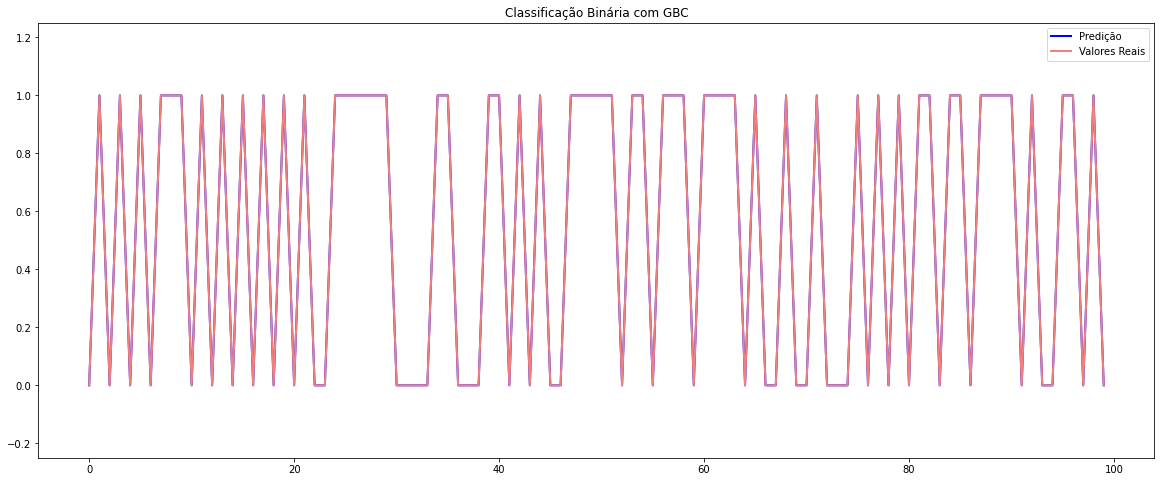

In [321]:
# Classificação Binária Quadrática do modelo GBC

plt.figure(figsize=(20,8))
plt.plot(y_pred[200:300], label="Predição", linewidth=2.0,color='blue')
plt.plot(y_test[200:300].values, label="Valores Reais", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-0.25,1.25))
plt.title("Classificação Binária com GBC")
plt.show()

In [322]:
def plot_roc_cur_bin(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de falso positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva Receiver Operating Characteristic (ROC)')
    plt.legend()
    plt.show()

A pontuação ROC AUC é 0.9851749812727771


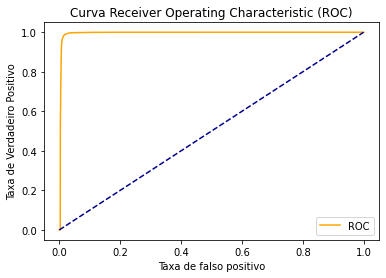

In [323]:
roc_auc_bin = roc_auc_score(y_test, y_pred)
print(f'A pontuação ROC AUC é {roc_auc_bin}')

model = gbc_bin
probs = model.predict_proba(X_test)
probs = probs[:,1]
fper, tper, thresholds = roc_curve(y_test, probs)
plot_roc_cur_bin(fper, tper)

## 2) Linear Support Vector Machine Classifier (LSVM)

### Classficação Binária

In [283]:
# Lendo o dataset KDD binário:

le1_classes_ = np.load('./le1_classes.npy', allow_pickle=True)

df_bin = pd.read_csv('./KDDTrain_bin.csv')
df_bin

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,target_class,attack,normal,target
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,0,0,0,1,0,1,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,1,0,0,0,0,0,0,1,0,attack
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,...,1,0,0,0,0,0,0,1,0,attack
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,...,1,0,0,0,0,0,0,1,0,attack


In [284]:
# Excluindo do dataset os atributos (attacks, attack, normal, target) do elemento X

X = df_bin.iloc[:,:-4].to_numpy()

# Atributo-alvo como elemento y

y = df_bin['target_class']

In [285]:
# Dividindo o dataset entre treino (75%) e teste (25%):

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [287]:
lsvm_bin = LinearSVC(random_state=42).fit(X_train, y_train)

In [288]:
y_pred = lsvm_bin.predict(X_test)
ac_lsvm_bin = accuracy_score(y_test, y_pred) * 100
accur_lsvm_bin = ac_lsvm_bin
print(f'Precisão do conjunto binário LSVM:\n%.2f%%' % ac_lsvm_bin)

Precisão do conjunto binário LSVM:
96.76%


In [291]:
# Classification Report
print(f'Classification Report:\n{classification_report(y_test, y_pred, target_names=le1_classes_, digits=4)}')

Classification Report:
              precision    recall  f1-score   support

      attack     0.9720    0.9583    0.9651     14720
      normal     0.9638    0.9757    0.9698     16774

    accuracy                         0.9676     31494
   macro avg     0.9679    0.9670    0.9674     31494
weighted avg     0.9676    0.9676    0.9676     31494



In [292]:
# Imprimindo outras métrias importantes
print("Mean Absolute Error (MAE) - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE) - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred) * 100)
print("Accuracy - ",accuracy_score(y_test,y_pred) * 100)

Mean Absolute Error (MAE) -  0.03241887343621007
Mean Squared Error (MSE) -  0.03241887343621007
Root Mean Squared Error (RMSE) -  0.18005241857917395
R2 Score -  86.99441156020447
Accuracy -  96.758112656379


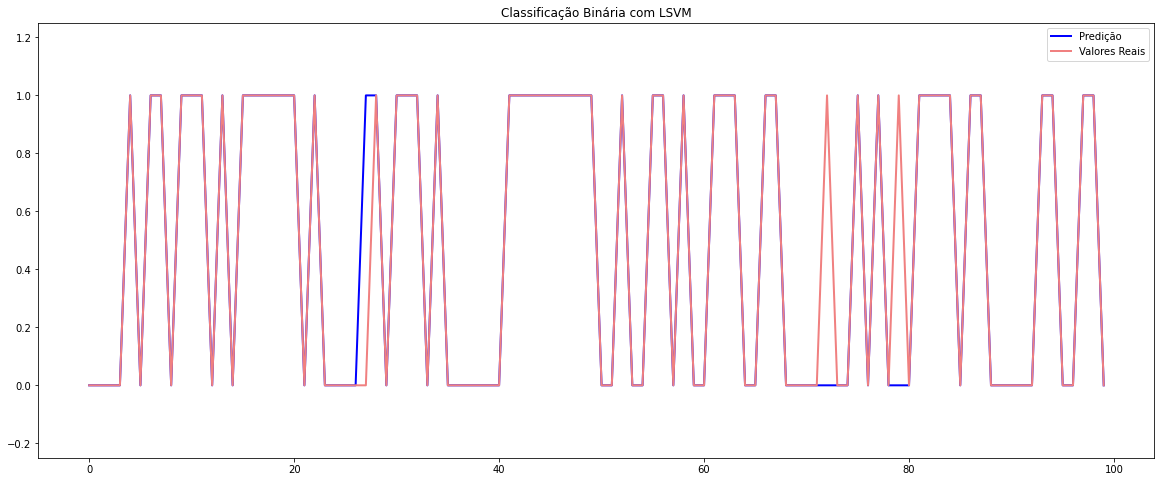

In [293]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="Predição", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="Valores Reais", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-0.25,1.25))
plt.title('Classificação Binária com LSVM')
plt.show()

Matriz de Confusão:
[[True Positive: 14106 - False Positive: 407]
[False Negative: 614 - True Negative: 16367]]



Text(0.5, 0, 'Previsto')

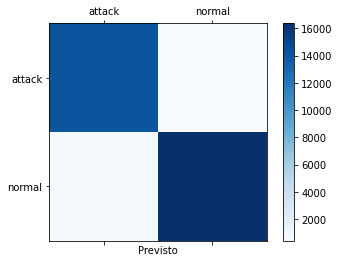

In [294]:
# Matriz de Confusão:
y_pred = lsvm_bin.predict(X_test)
conf_matrix_lsvm_bin = confusion_matrix(y_pred, y_test)

tp, fp, fn, tn = conf_matrix_lsvm_bin.ravel()
print(f'Matriz de Confusão:\n[[True Positive: {tp} - False Positive: {fp}]\n[False Negative: {fn} - True Negative: {tn}]]\n')

labels = ['attack', 'normal']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_matrix_lsvm_bin, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Previsto')

### Classificação Multiclasse

In [358]:
le2_classes_ = np.load('./le2_classes.npy', allow_pickle=True)

df_lsvm_multi = pd.read_csv('./KDDTrain_multi.csv')
df_lsvm_multi

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,target_class,DoS,Probe,R2L,U2R,normal,target
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,1,0,4,0,0,0,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,0,0,0,0,1,0,0,0,0,DoS
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,...,0,0,0,0,1,0,0,0,0,DoS
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,...,0,0,0,0,1,0,0,0,0,DoS


In [360]:
# Excluindo do dataset os atributos (target_class, DoS, Probe, R2L, U2R, normal, target) do elemento X
X = df_lsvm_multi.iloc[:,:-7].to_numpy()

# Atributo-alvo como elemento y
y = df_lsvm_multi['target_class']

In [361]:
# Dividindo o dataset entre treino (75%) e teste (25%):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [362]:
# Treinando o modelo LSVM Multiclasse
lsvm_multi = LinearSVC(random_state=5).fit(X_train, y_train)

In [363]:
y_pred = lsvm_multi.predict(X_test)
ac_lsvm_multi = accuracy_score(y_test, y_pred) * 100
accur_lsvm_multi = ac_lsvm_multi
print(f'Precisão do conjunto multiclasse LSVM:\n%.2f%%' % ac_lsvm_multi)

Precisão do conjunto multiclasse LSVM:
94.48%


In [152]:
# Classification Report
print(f'Classification Report:\n{classification_report(y_test, y_pred, target_names=le2_classes_, digits=4)}')

Classification Report:
              precision    recall  f1-score   support

         DoS     0.9447    0.9596    0.9521     11484
       Probe     0.8456    0.7638    0.8026      2947
         R2L     0.2222    0.0146    0.0274       274
         U2R     0.0000    0.0000    0.0000        15
      normal     0.9610    0.9825    0.9716     16774

    accuracy                         0.9448     31494
   macro avg     0.5947    0.5441    0.5507     31494
weighted avg     0.9374    0.9448    0.9400     31494



In [153]:
# Imprimindo outras métrias importantes
print("Mean Absolute Error (MAE) - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE) - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred) * 100)
print("Accuracy - ",accuracy_score(y_test,y_pred) * 100)

Mean Absolute Error (MAE) -  0.11735568679748523
Mean Squared Error (MSE) -  0.3269829173810885
Root Mean Squared Error (RMSE) -  0.5718242014650031
R2 Score -  90.98953531131953
Accuracy -  94.47831332952309


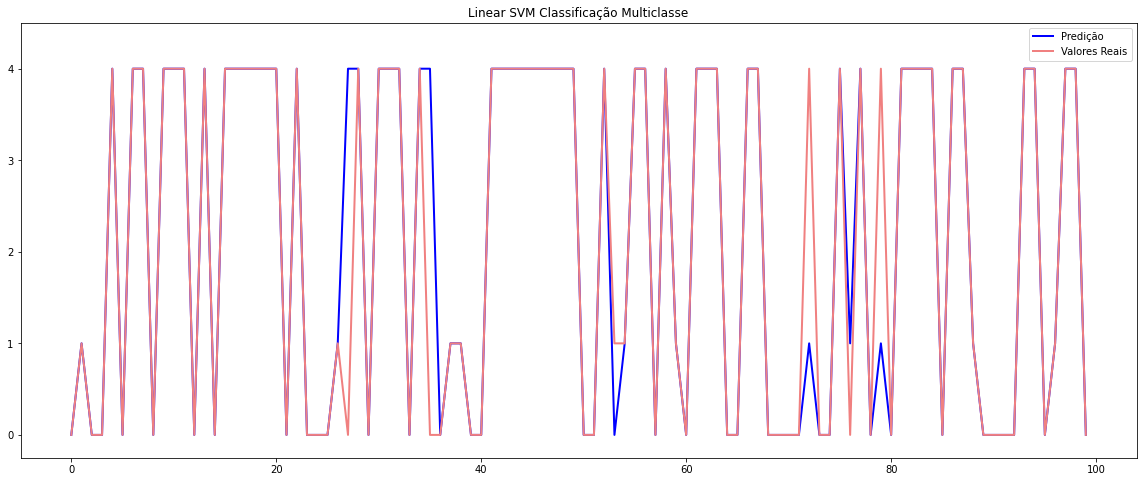

In [154]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="Predição", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="Valores Reais", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-0.25,4.50))
plt.title('Classificação Multiclasse com Linear SVM')
plt.show()

## 3) K-Nearest Neighbors Classifier (KNN)

### Classificação Binária

In [295]:
# Lendo o dataset KDD binário:

le1_classes_ = np.load('./le1_classes.npy', allow_pickle=True)

df_knn_bin = pd.read_csv('./KDDTrain_bin.csv')
df_knn_bin

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,target_class,attack,normal,target
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,0,0,0,1,0,1,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,1,0,0,0,0,0,0,1,0,attack
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,...,1,0,0,0,0,0,0,1,0,attack
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,...,1,0,0,0,0,0,0,1,0,attack


In [296]:
# Excluindo do dataset os atributos (target_class, attack, normal, target) do elemento X

X = df_knn_bin.iloc[:,:-4].to_numpy()

# Atributo-alvo como elemento y

y = df_knn_bin['target_class']

In [297]:
# Dividindo o dataset entre treino (75%) e teste (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [298]:
knn_bin = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2).fit(X_train, y_train)

In [301]:
y_pred = knn_bin.predict(X_test)

ac_knn_bin = accuracy_score(y_test, y_pred) * 100
accur_knn_bin = ac_knn_bin
print(f'Precisão do conjunto binário KNN:\n%.2f%%' % ac_knn_bin)

Precisão do conjunto binário KNN:
98.57%


In [303]:
# Classification Report
print(f'Classification Report:\n{classification_report(y_test, y_pred, target_names=le1_classes_, digits=4)}')

Classification Report:
              precision    recall  f1-score   support

      attack     0.9858    0.9836    0.9847     14720
      normal     0.9857    0.9876    0.9866     16774

    accuracy                         0.9857     31494
   macro avg     0.9857    0.9856    0.9857     31494
weighted avg     0.9857    0.9857    0.9857     31494



In [304]:
# Imprimindo outras métrias importantes
print("Mean Absolute Error (MAE) - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE) - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred) * 100)
print("Accuracy - ",accuracy_score(y_test,y_pred) * 100)

Mean Absolute Error (MAE) -  0.014256683812789737
Mean Squared Error (MSE) -  0.014256683812789737
Root Mean Squared Error (RMSE) -  0.11940135599225721
R2 Score -  94.2734076514637
Accuracy -  98.57433161872102


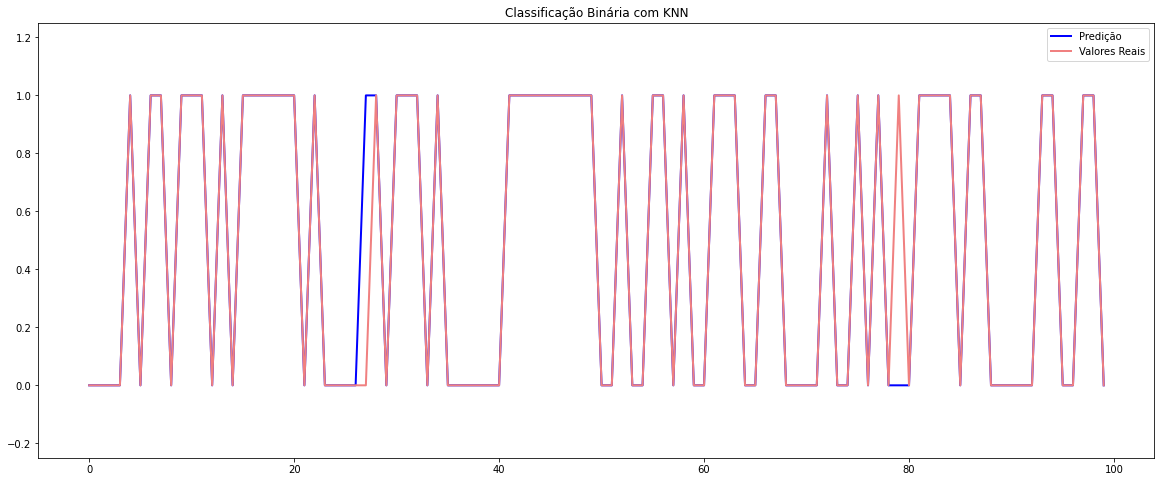

In [305]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="Predição", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="Valores Reais", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-0.25,1.25))
plt.title('Classificação Binária com KNN')
plt.show()

Matriz de Confusão:
[[True Positive: 14479 - False Positive: 208]
[False Negative: 241 - True Negative: 16566]]



Text(0.5, 0, 'Previsto')

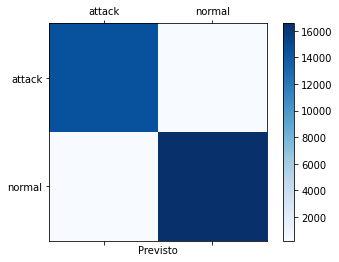

In [306]:
# Matriz de Confusão:
y_pred = knn_bin.predict(X_test)
conf_matrix_knn_bin = confusion_matrix(y_pred, y_test)

tp, fp, fn, tn = conf_matrix_knn_bin.ravel()
print(f'Matriz de Confusão:\n[[True Positive: {tp} - False Positive: {fp}]\n[False Negative: {fn} - True Negative: {tn}]]\n')

labels = ['attack', 'normal']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_matrix_knn_bin, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Previsto')

In [307]:
def plot_roc_cur_knn_bin(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de falso positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva Receiver Operating Characteristic (ROC)')
    plt.legend()
    plt.show()

A pontuação ROC AUC é 0.9856137871563653


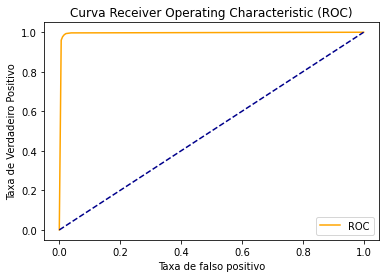

In [308]:
roc_auc_knn_bin = roc_auc_score(y_test, y_pred)
print(f'A pontuação ROC AUC é {roc_auc_knn_bin}')

model = knn_bin
probs = model.predict_proba(X_test)
probs = probs[:,1]
fper, tper, thresholds = roc_curve(y_test, probs)
plot_roc_cur_knn_bin(fper, tper)

### Classificação Multiclasse

In [365]:
le2_classes_ = np.load('./le2_classes.npy', allow_pickle=True)

df_knn_multi = pd.read_csv('./KDDTrain_multi.csv')
df_knn_multi

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,target_class,DoS,Probe,R2L,U2R,normal,target
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,1,0,4,0,0,0,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,0,0,0,0,1,0,0,0,0,DoS
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,...,0,0,0,0,1,0,0,0,0,DoS
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,...,0,0,0,0,1,0,0,0,0,DoS


In [366]:
# Excluindo do dataset os atributos (target_class, DoS, Probe, R2L, U2R, normal, target) do elemento X
X = df_knn_multi.iloc[:,:-7].to_numpy()

# Atributo-alvo como elemento y
y = df_knn_multi['target_class']

In [367]:
# Dividindo o dataset entre treino (75%) e teste (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [368]:
# Treinando o modelo KNN multiclasse
knn_multi = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2).fit(X_train, y_train)

In [369]:
y_pred = knn_multi.predict(X_test)

ac_knn_multi = accuracy_score(y_test, y_pred) * 100
accur_knn_multi = ac_knn_multi
print(f'Precisão do conjunto multiclasse KNN:\n%.2f%%' % ac_knn_multi)

Precisão do conjunto multiclasse KNN:
98.31%


In [371]:
# Classification Report
print(f'Classification Report:\n{classification_report(y_test, y_pred, target_names=le2_classes_, digits=4)}')

Classification Report:
              precision    recall  f1-score   support

         DoS     0.9882    0.9849    0.9866     11484
       Probe     0.9560    0.9654    0.9607      2947
         R2L     0.9015    0.8686    0.8848       274
         U2R     1.0000    0.0667    0.1250        15
      normal     0.9857    0.9876    0.9866     16774

    accuracy                         0.9831     31494
   macro avg     0.9663    0.7746    0.7887     31494
weighted avg     0.9831    0.9831    0.9829     31494



In [372]:
# Imprimindo outras métrias importantes
print("Mean Absolute Error (MAE) - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE) - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred) * 100)
print("Accuracy - ",accuracy_score(y_test,y_pred) * 100)

Mean Absolute Error (MAE) -  0.050073029783450816
Mean Squared Error (MSE) -  0.16927033720708706
Root Mean Squared Error (RMSE) -  0.411424764941401
R2 Score -  95.32956010032153
Accuracy -  98.30761414872674


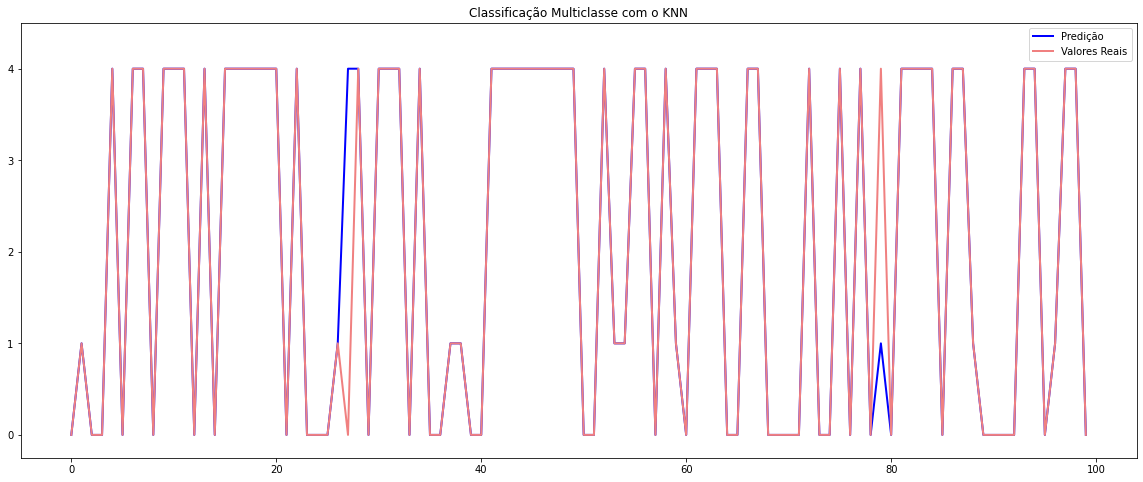

In [373]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="Predição", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="Valores Reais", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-0.25,4.50))
plt.title('Classificação Multiclasse com o KNN')
plt.show()

## 4) Gaussian Naïve Bayes Classifier (GNB)

### Classificação Binária

In [327]:
le1_classes_ = np.load('./le1_classes.npy', allow_pickle=True)

df_gnb_bin = pd.read_csv('./KDDTrain_bin.csv')
df_gnb_bin

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,target_class,attack,normal,target
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,0,0,0,1,0,1,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,1,0,0,0,0,0,0,1,0,attack
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,...,1,0,0,0,0,0,0,1,0,attack
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,...,1,0,0,0,0,0,0,1,0,attack


In [328]:
# Excluindo do dataset os atributos (target_class, attack, normal, target) do elemento X
X = df_gnb_bin.iloc[:,:-4].to_numpy()

# Atributo-alvo como elemento y
y = df_gnb_bin['target_class']

In [329]:
# Dividindo o dataset entre treino (75%) e teste (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [330]:
gnb_bin = GaussianNB().fit(X_train, y_train)

In [331]:
y_pred = gnb_bin.predict(X_test)

ac_gnb_bin = accuracy_score(y_test, y_pred) * 100
accur_gnb = ac_gnb_bin
print(f'Precisão do conjunto binário GaussianNB:\n%.2f%%' % ac_gnb_bin)

Precisão do conjunto binário GaussianNB:
84.33%


In [333]:
# Classification Report
print(f'Classification Report:\n{classification_report(y_test, y_pred, target_names=le1_classes_, digits=4)}')

Classification Report:
              precision    recall  f1-score   support

      attack     0.9959    0.6674    0.7992     14720
      normal     0.7736    0.9976    0.8715     16774

    accuracy                         0.8433     31494
   macro avg     0.8848    0.8325    0.8353     31494
weighted avg     0.8775    0.8433    0.8377     31494



In [334]:
# Imprimindo outras métrias importantes
print("Mean Absolute Error (MAE) - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE) - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred) * 100)
print("Accuracy - ",accuracy_score(y_test,y_pred) * 100)

Mean Absolute Error (MAE) -  0.15672826570140344
Mean Squared Error (MSE) -  0.15672826570140344
Root Mean Squared Error (RMSE) -  0.39588920887213314
R2 Score -  46.591107614786864
Accuracy -  84.32717342985966


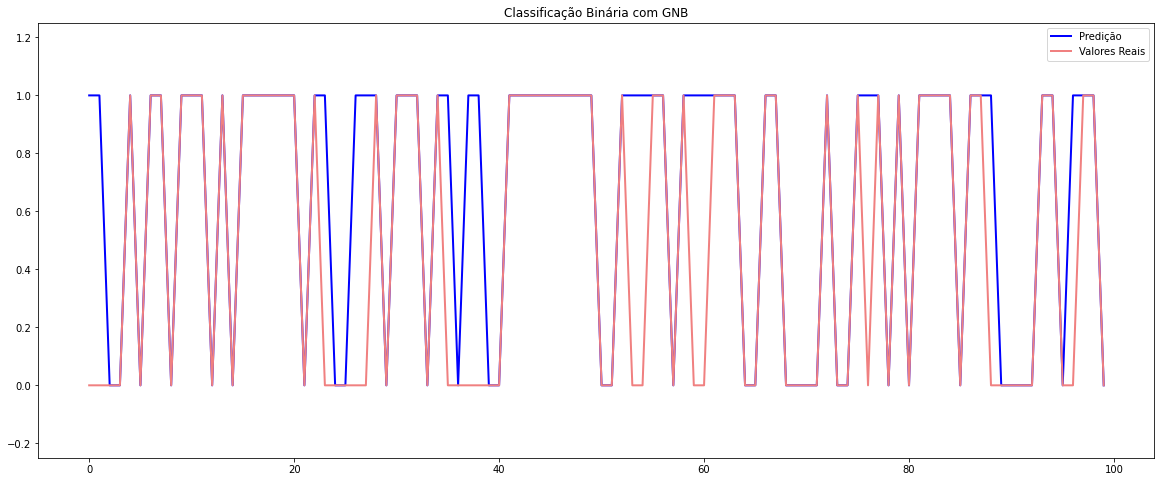

In [335]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="Predição", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="Valores Reais", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-0.25,1.25))
plt.title('Classificação Binária com GNB')
plt.show()

Matriz de Confusão:
[[True Positive: 9824 - False Positive: 40]
[False Negative: 4896 - True Negative: 16734]]



Text(0.5, 0, 'Previsto')

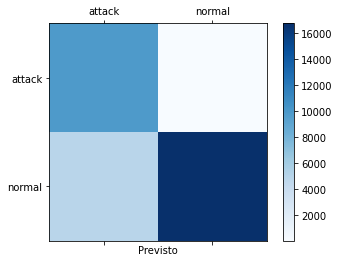

In [336]:
# Matriz de Confusão:
y_pred = gnb_bin.predict(X_test)
conf_matrix_gnb_bin = confusion_matrix(y_pred, y_test)

tp, fp, fn, tn = conf_matrix_gnb_bin.ravel()
print(f'Matriz de Confusão:\n[[True Positive: {tp} - False Positive: {fp}]\n[False Negative: {fn} - True Negative: {tn}]]\n')

labels = ['attack', 'normal']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_matrix_gnb_bin, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Previsto')

In [337]:
def plot_roc_cur_gnb_bin(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de falso positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva Receiver Operating Characteristic (ROC)')
    plt.legend()
    plt.show()

A pontuação ROC AUC é 0.8325033307240503


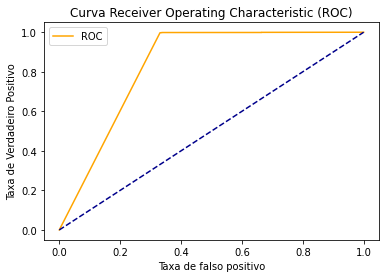

In [338]:
roc_auc_gnb_bin = roc_auc_score(y_test, y_pred)
print(f'A pontuação ROC AUC é {roc_auc_gnb_bin}')

model = gnb_bin
probs = model.predict_proba(X_test)
probs = probs[:,1]
fper, tper, thresholds = roc_curve(y_test, probs)
plot_roc_cur_gnb_bin(fper, tper)

## 5) Logistic Regression (LR)

### Classificação Binária

In [339]:
le1_classes_ = np.load('./le1_classes.npy', allow_pickle=True)

df_lr_bin = pd.read_csv('./KDDTrain_bin.csv')
df_lr_bin

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,target_class,attack,normal,target
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,0,0,0,1,0,1,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,1,0,0,0,0,0,0,1,0,attack
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,...,1,0,0,0,0,0,0,1,0,attack
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,...,1,0,0,0,0,0,0,1,0,attack


In [340]:
# Exculdindo do dataset os atributos (target_class, attack, normal, target) do elemento X
X = df_lr_bin.iloc[:,:-4].to_numpy()

# Atributo-alvo como elemento y
y = df_lr_bin['target_class']

In [341]:
# Dividindo o dataset entre treino (75%) e teste (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [342]:
# Treinando o modelo
lr_bin = LogisticRegression(random_state=42).fit(X_train, y_train)

In [344]:
y_pred = lr_bin.predict(X_test)

ac_lr_bin = accuracy_score(y_test, y_pred) * 100
accur_lr = ac_lr_bin
print(f'Precisão do conjunto binário Logistic Regression:\n%.2f%%' % ac_lr_bin)

Precisão do conjunto binário Logistic Regression:
96.97%


In [240]:
# Classification Report
print(f'Classification Report:\n{classification_report(y_test, y_pred, target_names=le1_classes_, digits=4)}')

Classification Report:
              precision    recall  f1-score   support

      attack     0.9772    0.9575    0.9673     14720
      normal     0.9634    0.9804    0.9718     16774

    accuracy                         0.9697     31494
   macro avg     0.9703    0.9690    0.9695     31494
weighted avg     0.9698    0.9697    0.9697     31494



In [241]:
# Imprimindo outras métrias importantes
print("Mean Absolute Error (MAE) - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE) - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred) * 100)
print("Accuracy - ",accuracy_score(y_test,y_pred) * 100)

Mean Absolute Error (MAE) -  0.03029148409220804
Mean Squared Error (MSE) -  0.03029148409220804
Root Mean Squared Error (RMSE) -  0.1740444888303219
R2 Score -  87.86713294643367
Accuracy -  96.97085159077919


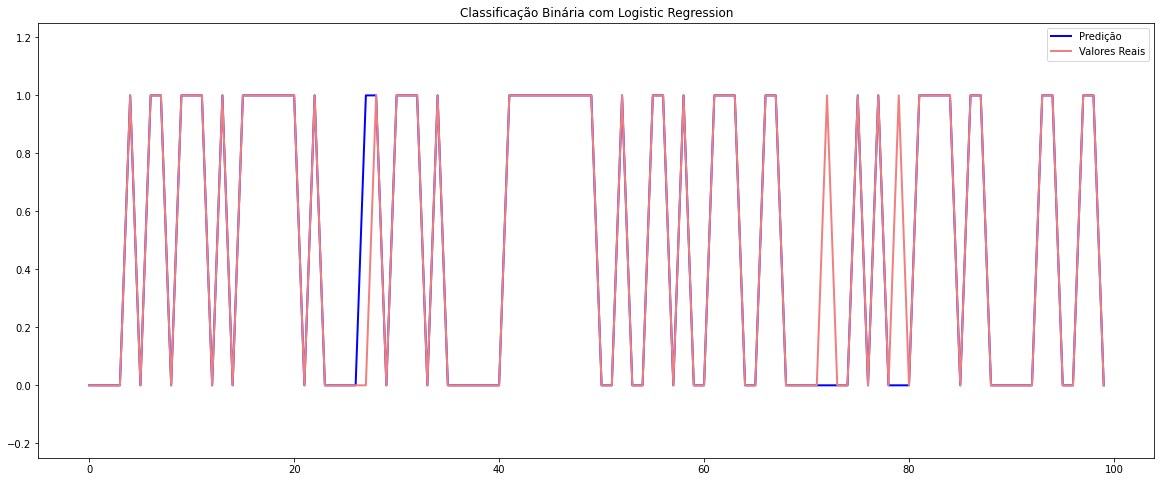

In [242]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="Predição", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="Valores Reais", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-0.25,1.25))
plt.title('Classificação Binária com Logistic Regression')
plt.show()

Matriz de Confusão:
[[True Positive: 14095 - False Positive: 329]
[False Negative: 625 - True Negative: 16445]]



Text(0.5, 0, 'Previsto')

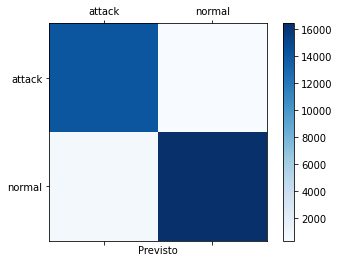

In [243]:
# Matriz de Confusão:
y_pred = lr_bin.predict(X_test)
conf_matrix_lr_bin = confusion_matrix(y_pred, y_test)

tp, fp, fn, tn = conf_matrix_lr_bin.ravel()
print(f'Matriz de Confusão:\n[[True Positive: {tp} - False Positive: {fp}]\n[False Negative: {fn} - True Negative: {tn}]]\n')

labels = ['attack', 'normal']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_matrix_lr_bin, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Previsto')

In [244]:
def plot_roc_cur_lr_bin(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de falso positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva Receiver Operating Characteristic (ROC)')
    plt.legend()
    plt.show()

A pontuação ROC AUC é 0.9689635365096604


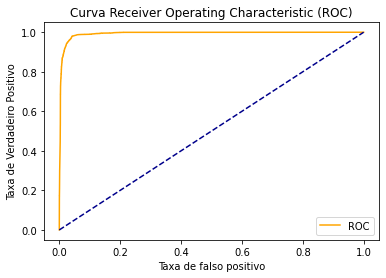

In [245]:
roc_auc_lr_bin = roc_auc_score(y_test, y_pred)
print(f'A pontuação ROC AUC é {roc_auc_lr_bin}')

model = lr_bin
probs = model.predict_proba(X_test)
probs = probs[:,1]
fper, tper, thresholds = roc_curve(y_test, probs)
plot_roc_cur_lr_bin(fper, tper)

### Classificação Multiclasse

In [374]:
le2_classes_ = np.load('./le2_classes.npy', allow_pickle=True)

df_lr_multi = pd.read_csv('./KDDTrain_multi.csv')
df_lr_multi

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S3,flag_SF,flag_SH,target_class,DoS,Probe,R2L,U2R,normal,target
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,1,0,4,0,0,0,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,0,0,0,0,1,0,0,0,0,DoS
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,...,0,0,0,0,1,0,0,0,0,DoS
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,1,0,4,0,0,0,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,...,0,0,0,0,1,0,0,0,0,DoS


In [375]:
# Exculdindo do dataset os atributos (target_class, DoS, Probe, R2L, U2R, normal, target) do elemento X
X = df_lr_multi.iloc[:,:-7].to_numpy()

# Atributo-alvo como elemento y
y = df_lr_multi['target_class']

In [376]:
# Dividindo o dataset entre treino (75%) e teste (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [377]:
# Treinando o modelo
lr_multi = LogisticRegression(random_state=42, solver='newton-cg', multi_class='multinomial').fit(X_train, y_train)

In [378]:
y_pred = lr_multi.predict(X_test)

ac_lr_multi = accuracy_score(y_test, y_pred) * 100
accur_lr_multi = ac_lr_multi
print(f'Precisão do conjunto multiclasse Logistic Regression:\n%.2f%%' % ac_lr_multi)

Precisão do conjunto multiclasse Logistic Regression:
95.42%


In [227]:
# Classification Report
print(f'Classification Report:\n{classification_report(y_test, y_pred, target_names=le2_classes_, digits=4)}')

Classification Report:
              precision    recall  f1-score   support

         DoS     0.9595    0.9606    0.9600     11484
       Probe     0.8564    0.8154    0.8354      2947
         R2L     0.7200    0.5912    0.6493       274
         U2R     0.0000    0.0000    0.0000        15
      normal     0.9700    0.9811    0.9755     16774

    accuracy                         0.9542     31494
   macro avg     0.7012    0.6697    0.6840     31494
weighted avg     0.9529    0.9542    0.9534     31494



In [228]:
# Imprimindo outras métrias importantes
print("Mean Absolute Error (MAE) - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE) - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred) * 100)
print("Accuracy - ",accuracy_score(y_test,y_pred) * 100)

Mean Absolute Error (MAE) -  0.10217819267162
Mean Squared Error (MSE) -  0.2958658792150886
Root Mean Squared Error (RMSE) -  0.5439355469309656
R2 Score -  91.84262646646764
Accuracy -  95.42452530640757


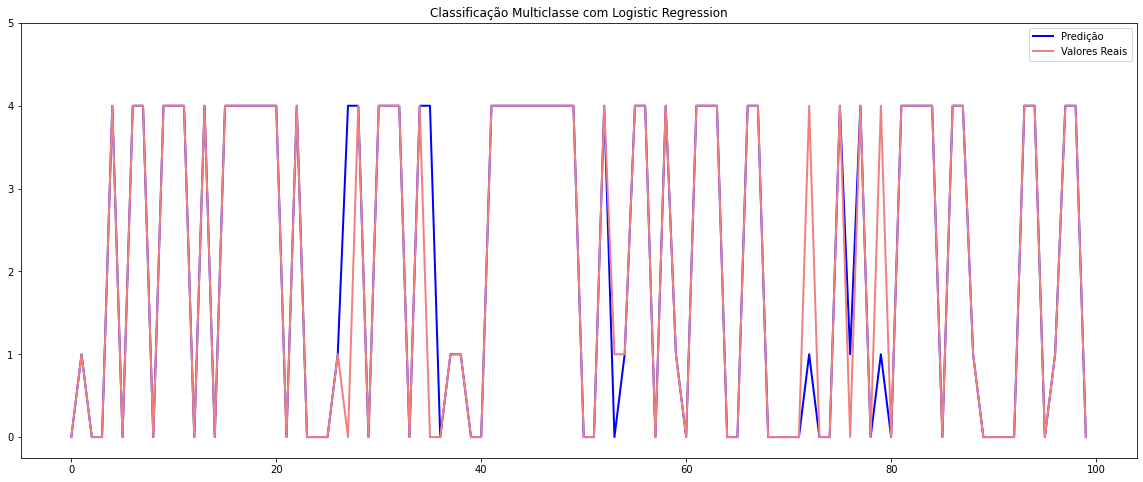

In [232]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="Predição", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="Valores Reais", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-0.25,5.00))
plt.title('Classificação Multiclasse com Logistic Regression')
plt.show()

## 6) Random Forest Classifier (RF)

### Classificação Binária

In [347]:
le1_classes_ = np.load('./le1_classes.npy', allow_pickle=True)

df_rf_bin = pd.read_csv('./KDDTrain_bin.csv')
df_rf_bin

,count,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_srv_serror_rate,logged_in,dst_host_same_srv_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,target_class,attack,normal,target
0,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-0.782367,-0.818890,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
1,-0.620982,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,-1.161030,-1.035688,-1.321428,0,...,0,0,0,0,1,0,1,0,1,normal
2,0.339648,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.809857,-1.389669,0,...,1,0,0,0,0,0,0,1,0,attack
3,-0.690846,-0.184522,-0.189235,-0.572083,-0.602433,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
4,-0.472521,-0.631929,-0.637209,-0.639532,-0.624871,1.235694,1.066401,1.258754,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.872361,1.605104,1.602664,1.608759,1.618955,-0.809262,-0.938287,-0.818890,-1.184947,0,...,1,0,0,0,0,0,0,1,0,attack
125969,-0.717045,-0.631929,-0.637209,-0.639532,-0.624871,-0.809262,0.977304,1.159389,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125970,-0.725778,-0.631929,-0.637209,0.979238,-0.624871,1.235694,-0.893738,-0.773724,0.771283,0,...,0,0,0,0,1,0,1,0,1,normal
125971,0.523041,1.605104,1.602664,1.608759,1.618955,-0.809262,-1.094207,-0.972455,-1.366922,0,...,1,0,0,0,0,0,0,1,0,attack


In [348]:
# Exculdindo do dataset os atributos (target_class, attack, normal, target) do elemento X
X = df_rf_bin.iloc[:,:-4].to_numpy()

# Atributo-alvo como elemento y
y = df_rf_bin['target_class']

In [349]:
# Dividindo o dataset entre treino (75%) e teste (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [350]:
rf_bin = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5).fit(X_train, y_train)

In [352]:
# Predição
y_pred = rf_bin.predict(X_test)

ac_rf_bin = accuracy_score(y_test, y_pred) * 100
accur_rf_bin = ac_rf_bin
print(f'Precisão do conjunto binário Random Forest:\n%.2f%%' % ac_rf_bin)

Precisão do conjunto binário Random Forest:
96.79%


In [260]:
# Classification Report
print(f'Classification Report:\n{classification_report(y_test, y_pred, target_names=le1_classes_, digits=4)}')

Classification Report:
              precision    recall  f1-score   support

      attack     0.9887    0.9421    0.9648     14720
      normal     0.9512    0.9905    0.9705     16774

    accuracy                         0.9679     31494
   macro avg     0.9699    0.9663    0.9677     31494
weighted avg     0.9687    0.9679    0.9678     31494



In [261]:
# Imprimindo outras métrias importantes
print("Mean Absolute Error (MAE) - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE) - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred) * 100)
print("Accuracy - ",accuracy_score(y_test,y_pred) * 100)

Mean Absolute Error (MAE) -  0.03210135263859783
Mean Squared Error (MSE) -  0.03210135263859783
Root Mean Squared Error (RMSE) -  0.17916850347814436
R2 Score -  87.29910963071731
Accuracy -  96.78986473614022


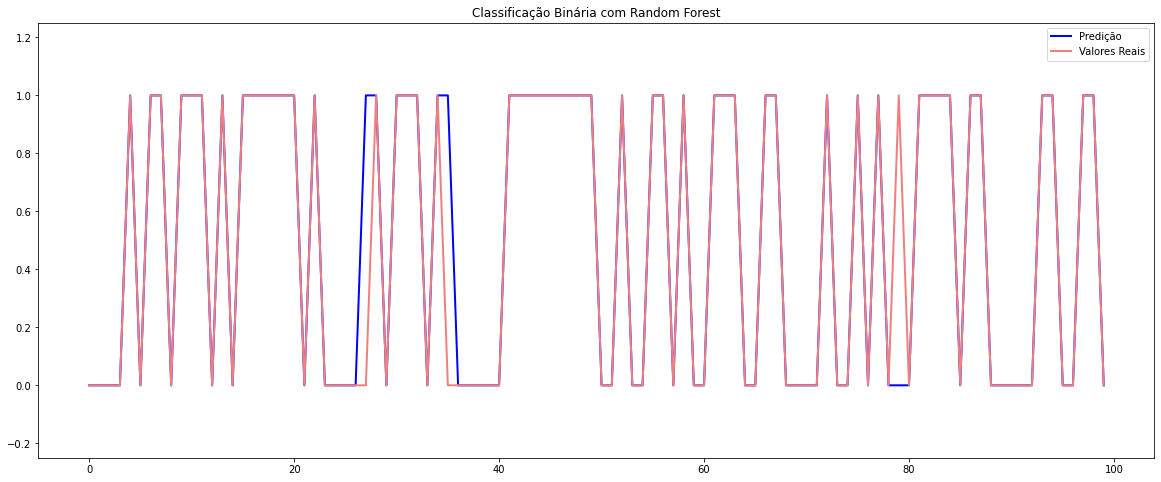

In [262]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[300:400], label="Predição", linewidth=2.0,color='blue')
plt.plot(y_test[300:400].values, label="Valores Reais", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.ylim((-0.25,1.25))
plt.title('Classificação Binária com Random Forest')
plt.show()

Matriz de Confusão:
[[True Positive: 13868 - False Positive: 159]
[False Negative: 852 - True Negative: 16615]]



Text(0.5, 0, 'Previsto')

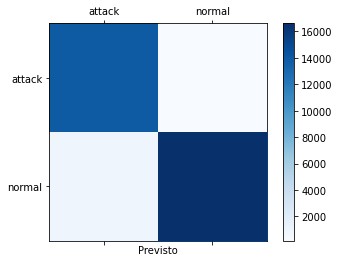

In [263]:
# Matriz de Confusão:
y_pred = rf_bin.predict(X_test)
conf_matrix_rf_bin = confusion_matrix(y_pred, y_test)

tp, fp, fn, tn = conf_matrix_rf_bin.ravel()
print(f'Matriz de Confusão:\n[[True Positive: {tp} - False Positive: {fp}]\n[False Negative: {fn} - True Negative: {tn}]]\n')

labels = ['attack', 'normal']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_matrix_rf_bin, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Previsto')

In [264]:
def plot_roc_cur_rf_bin(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de falso positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva Receiver Operating Characteristic (ROC)')
    plt.legend()
    plt.show()

A pontuação ROC AUC é 0.9663203048454907


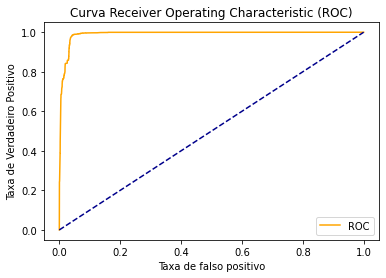

In [265]:
roc_auc_rf_bin = roc_auc_score(y_test, y_pred)
print(f'A pontuação ROC AUC é {roc_auc_rf_bin}')

model = rf_bin
probs = model.predict_proba(X_test)
probs = probs[:,1]
fper, tper, thresholds = roc_curve(y_test, probs)
plot_roc_cur_rf_bin(fper, tper)

# Resultado Final

## Acurácia (Classificação Binária)

In [356]:
print(f'Acurácia do modelo binário GBC é: %.2f%%' % accur_gbc)
print(f'Acurácia do modelo binário LSVM é: %.2f%%' % accur_lsvm_bin)
print(f'Acurácia do modelo binário KNN é: %.2f%%' % accur_knn_bin)
print(f'Acurácia do modelo binário GNB é: %.2f%%' % accur_gnb)
print(f'Acurácia do modelo binário LR é: %.2f%%' % accur_lr)
print(f'Acurácia do modelo binário RF é: %.2f%%' % accur_rf_bin)

Acurácia do modelo binário GBC é: 98.55%
Acurácia do modelo binário LSVM é: 96.76%
Acurácia do modelo binário KNN é: 98.57%
Acurácia do modelo binário GNB é: 84.33%
Acurácia do modelo binário LR é: 96.97%
Acurácia do modelo binário RF é: 96.79%


## Acurácia (Classificação Multiclasse)

In [379]:
print(f'Acurácia do modelo multiclasse LSVM é: %.2f%%' % accur_lsvm_multi)
print(f'Acurácia do modelo multiclasse KNN é: %.2f%%' % accur_knn_multi)
print(f'Acurácia do modelo multiclasse LR é: %.2f%%' % accur_lr_multi)

Acurácia do modelo multiclasse LSVM é: 94.48%
Acurácia do modelo multiclasse KNN é: 98.31%
Acurácia do modelo multiclasse LR é: 95.42%
